In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
import os 
import pandas as pd
import plotly.graph_objs as go
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, ImageDataGenerator

In [2]:
a=cv2.imread('../input/datazip1/dataset/1.jpg')


In [3]:
y=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
len(y)
y=np.array(y)
y
y=tf.keras.utils.to_categorical(
    y, num_classes=2, dtype='float32'
)

In [4]:
data=[]
for i in range(1,101):
    img = plt.imread('../input/datazip1/dataset/'+ str(i)+'.jpg')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
    resized=cv2.resize(gray,(50,50))
    data.append(resized)
    print('.',end=' ')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [5]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],50,50,1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
model=Sequential()
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
train_data,test_data,train_target,test_target=train_test_split(data,y,test_size=0.1,random_state=1)
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 1s 372ms/step - loss: 0.6918 - accuracy: 0.5039 - val_loss: 0.6445 - val_accuracy: 0.6111
Epoch 2/20
3/3 [==============================] - 0s 66ms/step - loss: 0.6672 - accuracy: 0.5148 - val_loss: 0.6686 - val_accuracy: 0.7778
Epoch 3/20
3/3 [==============================] - 0s 65ms/step - loss: 0.6665 - accuracy: 0.6298 - val_loss: 0.6112 - val_accuracy: 0.6111
Epoch 4/20
3/3 [==============================] - 0s 67ms/step - loss: 0.6398 - accuracy: 0.5000 - val_loss: 0.5889 - val_accuracy: 0.6111
Epoch 5/20
3/3 [==============================] - 0s 65ms/step - loss: 0.6218 - accuracy: 0.5799 - val_loss: 0.5752 - val_accuracy: 0.8333
Epoch 6/20
3/3 [==============================] - 0s 64ms/step - loss: 0.5829 - accuracy: 0.7656 - val_loss: 0.5091 - val_accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 0s 65ms/step - loss: 0.5339 - accuracy: 0.7734 - val_loss: 0.5190 - val_accuracy: 0.7778
Epoch 8/20
3/3 [==========

In [8]:
model.evaluate(test_data,test_target)

1/1 [==============================] - 0s 21ms/step - loss: 0.2533 - accuracy: 0.9000


[0.2533031105995178, 0.8999999761581421]

In [9]:
a=cv2.imread('../input/datazip1/dataset/100.jpg')
img1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(img1,(50,50))
reshaped=np.reshape(resized,(1,50,50,1))
#reshaped=reshaped/255.0
model.predict(reshaped)

array([[6.016072e-28, 1.000000e+00]], dtype=float32)

array([[1., 0.]], dtype=float32)

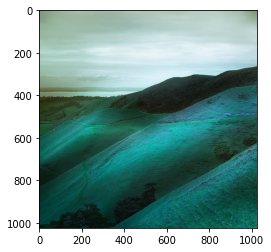

In [10]:
a=cv2.imread('../input/datazip1/dataset/1.jpg')
img1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(img1,(50,50))
reshaped=np.reshape(resized,(1,50,50,1))
#reshaped=reshaped/255.0
plt.imshow(a)
model.predict(reshaped)

array([[1., 0.]], dtype=float32)

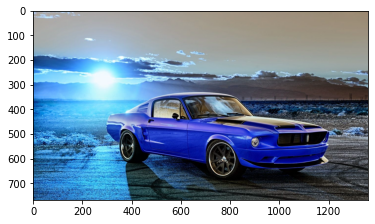

In [11]:
a=cv2.imread('../input/testzip/2 - Copy.jpg')
img1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(img1,(50,50))
reshaped=np.reshape(resized,(1,50,50,1))
#reshaped=reshaped/255.0
plt.imshow(a)
model.predict(reshaped)

array([[0., 1.]], dtype=float32)

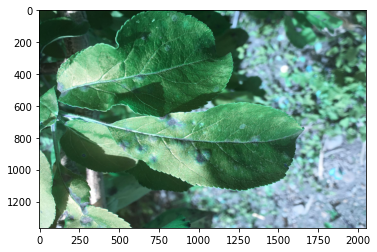

In [12]:
a=cv2.imread('../input/testzip/Test_185.jpg')
img1 = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(img1,(50,50))
reshaped=np.reshape(resized,(1,50,50,1))
#reshaped=reshaped/255.0
plt.imshow(a)
model.predict(reshaped)

In [13]:
model.save("pnp_2.h5")

In [14]:
m = tf.keras.models.load_model("./pnp_2.h5")

In [15]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0